In [ ]:
### CNN 기본

import numpy as np
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow as tf

import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#코랩 마운트
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd "/content/drive/My Drive/face"

/content/drive/My Drive/face


In [ ]:
#압축해제
#!unzip -qq "/content/drive/MyDrive/real-vs-fake.zip"

In [ ]:
# eda를 위해 데이터프레임 저장
path = '/content/drive/My Drive/face/'

dataset = {"image_path":[],"img_status":[],"where":[]}
for where in os.listdir(path):
    for status in os.listdir(path+"/"+where):
        for image in glob.glob(path+where+"/"+status+"/"+"*.jpg"):
            dataset["image_path"].append(image)
            dataset["img_status"].append(status)
            dataset["where"].append(where)
dataset = pd.DataFrame(dataset)
dataset

,image_path,img_status,where
0,/content/drive/My Drive/face/test/fake/00276TO...,fake,test
1,/content/drive/My Drive/face/test/fake/008BYSE...,fake,test
2,/content/drive/My Drive/face/test/fake/009ZTJ3...,fake,test
3,/content/drive/My Drive/face/test/fake/00F8LKY...,fake,test
4,/content/drive/My Drive/face/test/fake/00JEP4Z...,fake,test
...,...,...,...
139995,/content/drive/My Drive/face/valid/real/69960.jpg,real,valid
139996,/content/drive/My Drive/face/valid/real/69963.jpg,real,valid
139997,/content/drive/My Drive/face/valid/real/69987.jpg,real,valid
139998,/content/drive/My Drive/face/valid/real/69996.jpg,real,valid


In [ ]:
#개수 확인
total = dataset.value_counts("img_status")
real = dataset.value_counts("img_status")[1]
fake = dataset.value_counts("img_status")[0]
print(total, real, fake)

img_status
fake    70000
real    70000
dtype: int64 70000 70000


Real: 70000,
Fake: 70000



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


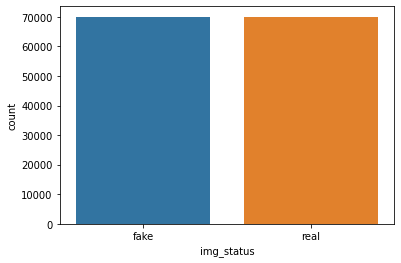

In [ ]:
#막대 그래프 plot
import seaborn as sns
print(f"Real: {real},\nFake: {fake}\n")
sns.countplot(dataset["img_status"])
plt.show()

In [ ]:
#데이터 경로 지정 등 설정
from tensorflow.keras import layers, models, backend, utils, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator()

train_generator = image_gen.flow_from_directory(
    path + 'train/',
    target_size=(32, 32),
    batch_size=64,
    color_mode='grayscale',
    class_mode='binary'
)

valid_generator = image_gen.flow_from_directory(
    path + 'valid/',
    target_size=(32, 32),
    batch_size=64,
    color_mode='grayscale',
    class_mode='binary'
)

test_generator = image_gen.flow_from_directory(
    path + 'test/',
    target_size=(32, 32),
    batch_size=64,
    color_mode='grayscale',
    shuffle = False,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
#구조 생성
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3),activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
#모델 학습
train_steps = 100000//64
valid_steps = 20000//64

hist = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_steps
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
1563/1563 [==============================] - 348s 223ms/step - loss: 0.4965 - accuracy: 0.7591 - val_loss: 0.4764 - val_accuracy: 0.7746
Epoch 2/10
1563/1563 [==============================] - 352s 225ms/step - loss: 0.4439 - accuracy: 0.7934 - val_loss: 0.4341 - val_accuracy: 0.8015
Epoch 3/10
1563/1563 [==============================] - 349s 223ms/step - loss: 0.4029 - accuracy: 0.8161 - val_loss: 0.4290 - val_accuracy: 0.8015
Epoch 4/10
1563/1563 [==============================] - 356s 228ms/step - loss: 0.3717 - accuracy: 0.8343 - val_loss: 0.4099 - val_accuracy: 0.8144
Epoch 5/10
1563/1563 [==============================] - 361s 231ms/step - loss: 0.3426 - accuracy: 0.8482 - val_loss: 0.3907 - val_accuracy: 0.8301
Epoch 6/10
1563/1563 [==============================] - 345s 221ms/step - loss: 0.3171 - accuracy: 0.8625 - val_loss: 0.3856 - val_accuracy: 0.8315
Epoch 7/10
1563/1563 [==============================] - 354s 226ms/step - loss: 0.2949 - accuracy: 0.8723 - val_

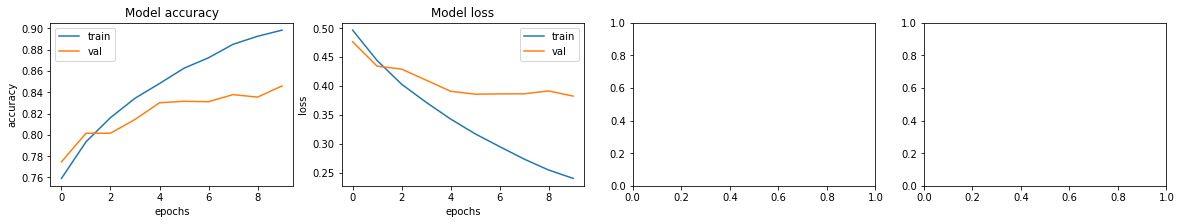

In [ ]:
#acc 및 loss plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate([ "accuracy", "loss"]):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history["val_" + met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)
    ax[i].legend(["train", "val"])

In [ ]:
#test 평가
model.evaluate(test_generator)

313/313 [==============================] - 60s 191ms/step - loss: 0.3795 - accuracy: 0.8445


[0.37950289249420166, 0.8445000052452087]